https://huggingface.co/datasets/recmeapp/mobilerec

In [1]:
pip install python-docx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the path to your CSV file
data_path = '../data'  # adjust if needed
file_path = os.path.join(data_path, 'mobilerec_final.csv')

# Load the MobileRec dataset
mobile = pd.read_csv(file_path)

# Show shape and sample
print(f"✅ mobilerec_final.csv shape: {mobile.shape}\n")

print("🔍 Sample rows:")
mobile.head()

✅ mobilerec_final.csv shape: (19297019, 9)

🔍 Sample rows:


,app_package,review,rating,votes,date,uid,formated_date,unix_timestamp,app_category
0,com.cleverapps.heroes,It's really a fun game,5,1,"October 21, 2018",shqoc6X1fcJRLEmx,2018-10-21,1.540094e+09,Casual
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,"January 18, 2019",shqoc6X1fcJRLEmx,2019-01-18,1.547788e+09,Health & Fitness
2,com.thrivegames.wordshapes,Love this game,4,1,"January 16, 2021",shqoc6X1fcJRLEmx,2021-01-16,1.610773e+09,Word
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,"November 4, 2021",shqoc6X1fcJRLEmx,2021-11-04,1.635998e+09,Entertainment
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,"November 24, 2021",shqoc6X1fcJRLEmx,2021-11-24,1.637730e+09,Dating


In [3]:
mobile.head()

,app_package,review,rating,votes,date,uid,formated_date,unix_timestamp,app_category
0,com.cleverapps.heroes,It's really a fun game,5,1,"October 21, 2018",shqoc6X1fcJRLEmx,2018-10-21,1.540094e+09,Casual
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,"January 18, 2019",shqoc6X1fcJRLEmx,2019-01-18,1.547788e+09,Health & Fitness
2,com.thrivegames.wordshapes,Love this game,4,1,"January 16, 2021",shqoc6X1fcJRLEmx,2021-01-16,1.610773e+09,Word
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,"November 4, 2021",shqoc6X1fcJRLEmx,2021-11-04,1.635998e+09,Entertainment
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,"November 24, 2021",shqoc6X1fcJRLEmx,2021-11-24,1.637730e+09,Dating


In [4]:
mobile.columns

Index(['app_package', 'review', 'rating', 'votes', 'date', 'uid',
       'formated_date', 'unix_timestamp', 'app_category'],
      dtype='object')

In [ ]:
import os
import pandas as pd

# Define path and load original file
data_path = '../data'
file_path = os.path.join(data_path, 'mobilerec_final.csv')
mobile = pd.read_csv(file_path)

# Count duplicates before deduplication
num_duplicates_before = mobile.duplicated(subset=['uid', 'app_package'], keep=False).sum()
print(f"🔁 Total duplicate rows (before cleaning): {num_duplicates_before}")

# Convert 'date' column to datetime
mobile['date'] = pd.to_datetime(mobile['date'])

# Sort and deduplicate (keep the most recent by date)
original_size = len(mobile)
mobile = mobile.sort_values('date').drop_duplicates(subset=['uid', 'app_package'], keep='last')

# Sanity check
print(f"📉 Original size: {original_size}")
print(f"📦 Deduplicated size (latest only): {len(mobile)}")
print(f"🗑️ Removed rows: {original_size - len(mobile)}")

# Double-check for remaining duplicates
num_duplicates_after = mobile.duplicated(subset=['uid', 'app_package'], keep=False).sum()
print(f"🔁 Total duplicate rows (after cleaning): {num_duplicates_after}")

# Save to a new file (do not overwrite)
new_file_path = os.path.join(data_path, 'mobile.csv')
mobile.to_csv(new_file_path, index=False)
print(f"💾 Deduplicated data saved as {new_file_path}")


🔁 Total duplicate rows (before cleaning): 311082


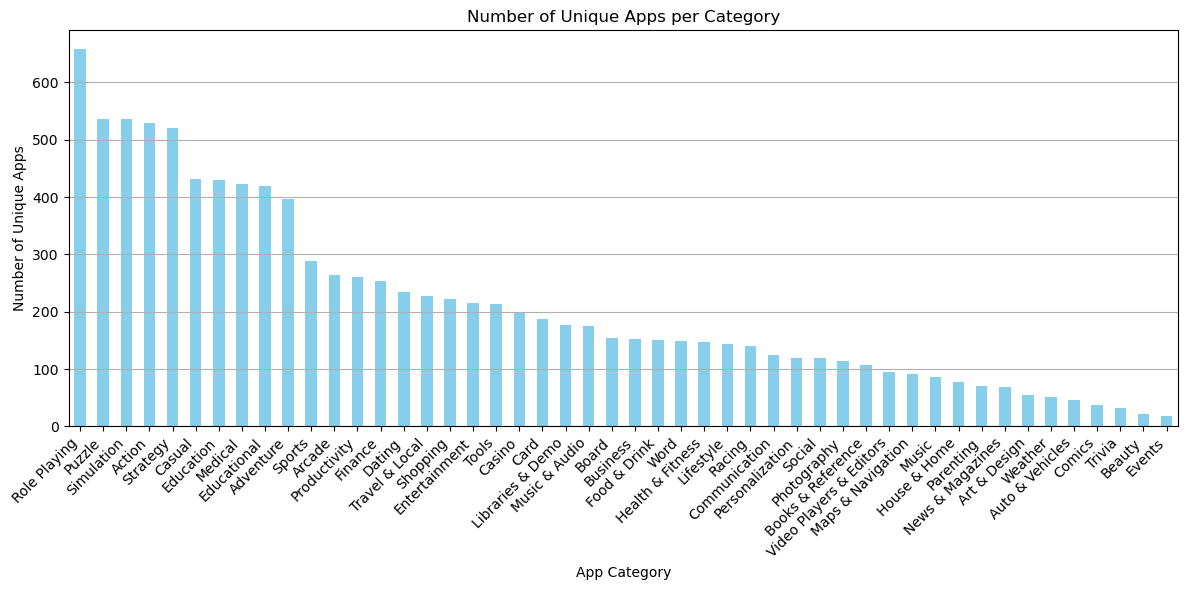


🔍 Missing Value Report:
Missing ratings: 0
Missing user IDs: 0
Missing app categories: 0
Missing app packages: 0

🧾 Number of duplicate rows: 0

📊 Total rows: 19140672
✅ Non-null ratings: 19140672
✔️ All rows have a rating.

📌 Dataset Summary:
Unique users: 700111
Unique apps: 10173
Unique categories: 48
Average ratings per user: 27.34
Min ratings per user: 4
Max ratings per user: 248


In [ ]:
df = pd.read_csv("../data/mobile.csv")

# ========== User & App Statistics ==========
unique_users = df['uid'].nunique()
unique_apps = df['app_package'].nunique()
ratings_per_user = df.groupby('uid').size()
average_ratings_per_user = ratings_per_user.mean()
min_ratings_per_user = ratings_per_user.min()
max_ratings_per_user = ratings_per_user.max()

# ========== Category Statistics ==========
unique_categories = df['app_category'].nunique()
apps_per_category = df.groupby('app_category')['app_package'].nunique().sort_values(ascending=False)

# ========== Plot: Apps per Category ==========
plt.figure(figsize=(12, 6))
apps_per_category.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Apps per Category')
plt.xlabel('App Category')
plt.ylabel('Number of Unique Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# ========== Missing Values ==========
missing_values = {
    "Missing ratings": df['rating'].isnull().sum(),
    "Missing user IDs": df['uid'].isnull().sum(),
    "Missing app categories": df['app_category'].isnull().sum(),
    "Missing app packages": df['app_package'].isnull().sum()
}

print("\n🔍 Missing Value Report:")
for key, val in missing_values.items():
    print(f"{key}: {val}")

# ========== Duplicate Rows ==========
duplicate_rows = df.duplicated().sum()
print(f"\n🧾 Number of duplicate rows: {duplicate_rows}")

# ========== Ratings Info ==========
total_rows = len(df)
non_null_ratings = df['rating'].notnull().sum()
print(f"\n📊 Total rows: {total_rows}")
print(f"✅ Non-null ratings: {non_null_ratings}")

if total_rows == non_null_ratings:
    print("✔️ All rows have a rating.")
else:
    print("⚠️ Some rows are missing a rating.")

# ========== Summary ==========
print("\n📌 Dataset Summary:")
print(f"Unique users: {unique_users}")
print(f"Unique apps: {unique_apps}")
print(f"Unique categories: {unique_categories}")
print(f"Average ratings per user: {average_ratings_per_user:.2f}")
print(f"Min ratings per user: {min_ratings_per_user}")
print(f"Max ratings per user: {max_ratings_per_user}")


In [4]:
df = pd.read_csv("../data/mobile.csv")

In [5]:
duplicates = df[df.duplicated(subset=['uid', 'app_package'], keep=False)]
duplicates.head(10)

,app_package,review,rating,votes,date,uid,formated_date,unix_timestamp,app_category


## Saving the cleaned df to start working on

In [6]:
import pandas as pd
import os

# Define paths
file_path = "../data/mobile.csv"
save_path = "../data/df_final.csv"

if os.path.getsize(file_path) == 0:
    print("⚠️ The file is empty!")
else:
    # Load and filter required columns
    df = pd.read_csv(file_path)
    df = df[['rating', 'uid', 'app_category', 'app_package']]

    # Rename columns
    df = df.rename(columns={
        'uid': 'user_id',
        'app_category': 'category',
        'app_package': 'app_id'
    })

    # Reorder columns
    df = df[['user_id', 'app_id', 'category', 'rating']]

    # Create mappings
    user_id_mapping = {uid: idx for idx, uid in enumerate(df['user_id'].unique(), start=1)}
    app_id_mapping = {aid: idx for idx, aid in enumerate(df['app_id'].unique(), start=1)}

    # Apply mappings and overwrite original columns
    df['user_id'] = df['user_id'].map(user_id_mapping)
    df['app_id'] = df['app_id'].map(app_id_mapping)

    # === ✅ SANITY CHECK ===
    missing_users = df['user_id'].isna().sum()
    missing_apps = df['app_id'].isna().sum()

    if missing_users > 0 or missing_apps > 0:
        print(f"❌ Mapping failed! Missing user_ids: {missing_users}, missing app_ids: {missing_apps}")
    else:
        print("✅ Mapping successful: No missing user_ids or app_ids")

        # Save final DataFrame
        df_final = df[['user_id', 'app_id', 'category', 'rating']]
        df_final.to_csv(save_path, index=False)

        print(f"📁 File saved as {save_path}")
        print("📊 Final Data Shape:", df_final.shape)


✅ Mapping successful: No missing user_ids or app_ids
📁 File saved as ../data/df_final.csv
📊 Final Data Shape: (19140672, 4)


In [2]:
df_final = pd.read_csv('../data/df_final.csv')

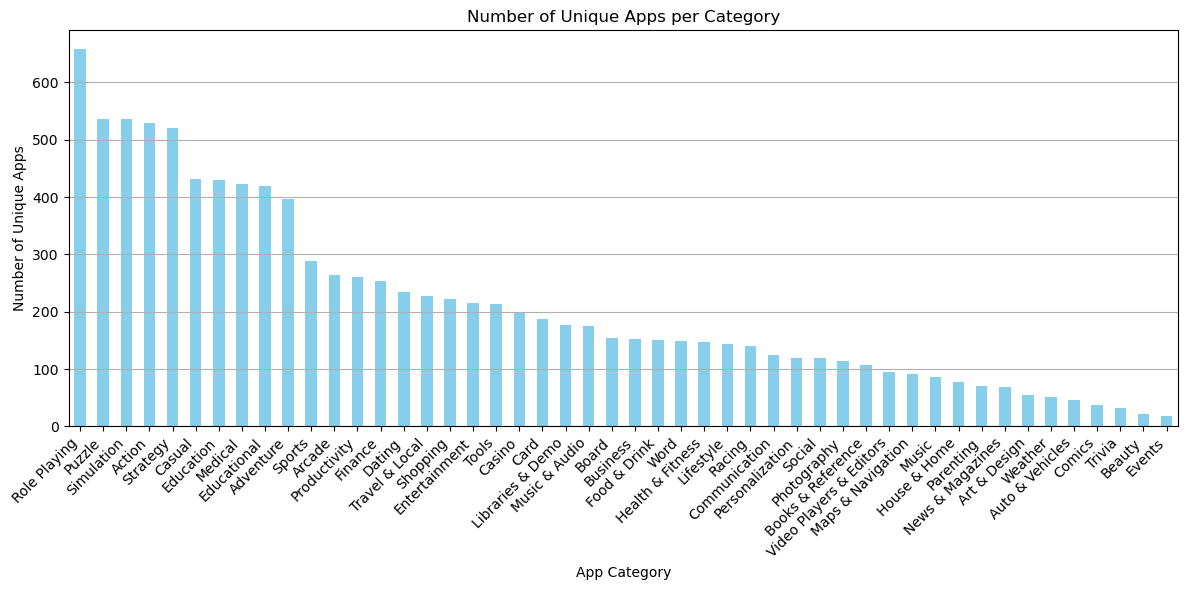


🔍 Missing Value Report:
Missing ratings: 0
Missing user IDs: 0
Missing categories: 0
Missing app IDs: 0

🧾 Number of duplicate rows: 0

📊 Total rows: 19140672
✅ Non-null ratings: 19140672
✔️ All rows have a rating.

📌 Dataset Summary:
Unique users: 700111
Unique apps: 10173
Unique categories: 48
Average ratings per user: 27.34
Min ratings per user: 4
Max ratings per user: 248

📦 Number of Unique Items per Category:
- Role Playing: 658 apps
- Puzzle: 537 apps
- Simulation: 537 apps
- Action: 529 apps
- Strategy: 520 apps
- Casual: 432 apps
- Education: 429 apps
- Medical: 422 apps
- Educational: 420 apps
- Adventure: 397 apps
- Sports: 289 apps
- Arcade: 264 apps
- Productivity: 260 apps
- Finance: 254 apps
- Dating: 234 apps
- Travel & Local: 228 apps
- Shopping: 223 apps
- Entertainment: 216 apps
- Tools: 214 apps
- Casino: 199 apps
- Card: 187 apps
- Libraries & Demo: 176 apps
- Music & Audio: 175 apps
- Board: 154 apps
- Business: 153 apps
- Food & Drink: 151 apps
- Word: 149 apps


In [ ]:
df_final = pd.read_csv('../data/df_final.csv')

# ========== User & App Statistics ==========
unique_users = df_final['user_id'].nunique()
unique_apps = df_final['app_id'].nunique()
ratings_per_user = df_final.groupby('user_id').size()
average_ratings_per_user = ratings_per_user.mean()
min_ratings_per_user = ratings_per_user.min()
max_ratings_per_user = ratings_per_user.max()

# ========== Category Statistics ==========
unique_categories = df_final['category'].nunique()
apps_per_category = df_final.groupby('category')['app_id'].nunique().sort_values(ascending=False)

def print_items_per_category(df):
    print("\n📦 Number of Unique Items per Category:")
    item_counts = df.groupby('category')['app_id'].nunique().sort_values(ascending=False)
    for category, count in item_counts.items():
        print(f"- {category}: {count} apps")

# ========== Plot: Apps per Category ==========
plt.figure(figsize=(12, 6))
apps_per_category.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Apps per Category')
plt.xlabel('App Category')
plt.ylabel('Number of Unique Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# ========== Missing Values ==========
missing_values = {
    "Missing ratings": df_final['rating'].isnull().sum(),
    "Missing user IDs": df_final['user_id'].isnull().sum(),
    "Missing categories": df_final['category'].isnull().sum(),
    "Missing app IDs": df_final['app_id'].isnull().sum()
}

print("\n🔍 Missing Value Report:")
for key, val in missing_values.items():
    print(f"{key}: {val}")

# ========== Duplicate Rows ==========
duplicate_rows = df.duplicated().sum()
print(f"\n🧾 Number of duplicate rows: {duplicate_rows}")

# ========== Ratings Info ==========
total_rows = len(df_final)
non_null_ratings = df_final['rating'].notnull().sum()
print(f"\n📊 Total rows: {total_rows}")
print(f"✅ Non-null ratings: {non_null_ratings}")

if total_rows == non_null_ratings:
    print("✔️ All rows have a rating.")
else:
    print("⚠️ Some rows are missing a rating.")

# ========== Summary ==========
print("\n📌 Dataset Summary:")
print(f"Unique users: {unique_users}")
print(f"Unique apps: {unique_apps}")
print(f"Unique categories: {unique_categories}")
print(f"Average ratings per user: {average_ratings_per_user:.2f}")
print(f"Min ratings per user: {min_ratings_per_user}")
print(f"Max ratings per user: {max_ratings_per_user}")
print_items_per_category(df_final)


In [18]:
num_duplicates_after_cleaning = df_final.duplicated(subset=['user_id', 'app_id'], keep=False).sum()
print(f"🔁 Total duplicate rows (after cleaning): {num_duplicates_after_cleaning}")

🔁 Total duplicate rows (after cleaning): 0


## computing user_entropy and clustering - initiate

In [ ]:
# Step 1: Count number of ratings per user per category
user_category_counts = df_final.groupby(['user_id', 'category']).size().unstack(fill_value=0)

# Step 2: Normalize counts so each user's row sums to 1
user_category_normalized = user_category_counts.div(user_category_counts.sum(axis=1), axis=0)

# Step 3: Rename columns to indicate normalization
user_category_normalized.columns = [f'{c}_norm' for c in user_category_normalized.columns]

# Step 4: Merge raw counts with normalized values
user_category_merged = pd.concat([user_category_counts, user_category_normalized], axis=1).reset_index()

# Step 5: Preview the result
user_category_merged.head()


,user_id,Action,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Business,...,Simulation_norm,Social_norm,Sports_norm,Strategy_norm,Tools_norm,Travel & Local_norm,Trivia_norm,Video Players & Editors_norm,Weather_norm,Word_norm
0,1,3,0,1,0,0,0,1,0,0,...,0.000000,0.000000,0.080000,0.040000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,2,4,1,5,0,0,0,1,0,0,...,0.017241,0.000000,0.017241,0.051724,0.034483,0.017241,0.000000,0.017241,0.0,0.034483
2,3,2,2,2,0,0,0,0,0,1,...,0.133333,0.022222,0.044444,0.022222,0.000000,0.066667,0.000000,0.000000,0.0,0.000000
3,4,13,3,5,0,1,0,2,0,1,...,0.054545,0.042424,0.024242,0.054545,0.018182,0.036364,0.000000,0.006061,0.0,0.012121
4,5,11,3,3,0,0,0,2,4,3,...,0.060811,0.020270,0.020270,0.054054,0.020270,0.013514,0.013514,0.033784,0.0,0.027027


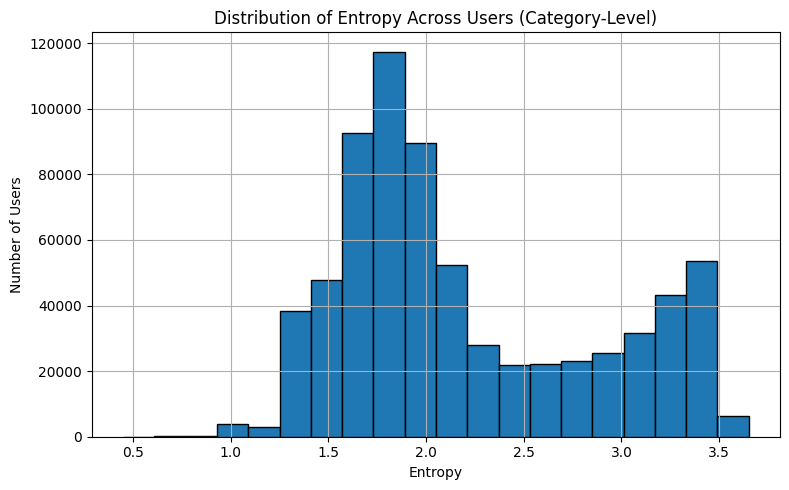


Entropy histogram distribution:
Entropy range [0.451, 0.611): 58 users
Entropy range [0.611, 0.771): 75 users
Entropy range [0.771, 0.931): 111 users
Entropy range [0.931, 1.091): 3852 users
Entropy range [1.091, 1.251): 2841 users
Entropy range [1.251, 1.411): 38297 users
Entropy range [1.411, 1.571): 47937 users
Entropy range [1.571, 1.731): 92619 users
Entropy range [1.731, 1.891): 117433 users
Entropy range [1.891, 2.051): 89559 users
Entropy range [2.051, 2.211): 52210 users
Entropy range [2.211, 2.371): 27950 users
Entropy range [2.371, 2.531): 21848 users
Entropy range [2.531, 2.691): 22029 users
Entropy range [2.691, 2.851): 22996 users
Entropy range [2.851, 3.011): 25675 users
Entropy range [3.011, 3.171): 31532 users
Entropy range [3.171, 3.331): 43299 users
Entropy range [3.331, 3.491): 53557 users
Entropy range [3.491, 3.651): 6233 users


In [5]:
import pandas as pd
from scipy.stats import entropy
import matplotlib.pyplot as plt

# Step 1: Count how many apps each user rated in each category
user_category_counts = df_final.groupby(['user_id', 'category']).size().unstack(fill_value=0)

# Step 2: Normalize counts to get per-user category distributions
user_category_normalized = user_category_counts.div(user_category_counts.sum(axis=1), axis=0)
user_category_normalized.columns = [f"{c}_norm" for c in user_category_normalized.columns]

# Step 3: Calculate entropy (diversity of preferences) per user
user_entropy = user_category_normalized.apply(lambda x: entropy(x), axis=1).to_frame(name='entropy')
user_entropy.reset_index(inplace=True)

# Step 4: Quantile-Based Clustering (3 clusters: low, mid, high diversity)
user_entropy_sorted = user_entropy.sort_values(by='entropy').reset_index(drop=True)
n_users = len(user_entropy_sorted)
user_entropy_sorted['cluster'] = pd.cut(
    user_entropy_sorted.index,
    bins=[-1, n_users // 3, 2 * n_users // 3, n_users],
    labels=[0, 1, 2]
).astype(int)

# Optional: Save the result
user_entropy_sorted.to_csv("../preprocessing/user_entropy_quantile.csv", index=False)

# Step 5: Plot histogram of entropy values & get counts
plt.figure(figsize=(8, 5))
counts, bin_edges, _ = plt.hist(user_entropy_sorted['entropy'], bins=20, edgecolor='black')
plt.title('Distribution of Entropy Across Users (Category-Level)')
plt.xlabel('Entropy')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Print the histogram distribution as text
print("\nEntropy histogram distribution:")
for i in range(len(counts)):
    print(f"Entropy range [{bin_edges[i]:.3f}, {bin_edges[i+1]:.3f}): {int(counts[i])} users")


In [21]:
import pandas as pd
from scipy.stats import entropy

# ===== Step 1: Count how many apps each user rated in each category =====
user_category_counts = df_final.groupby(['user_id', 'category']).size().unstack(fill_value=0)

# ===== Step 2: Normalize counts so each user's row sums to 1 =====
user_category_normalized = user_category_counts.div(user_category_counts.sum(axis=1), axis=0)
user_category_normalized.columns = [f'{c}_norm' for c in user_category_normalized.columns]

# ===== Step 3: Combine raw counts and normalized values =====
user_category_merged = pd.concat([user_category_counts, user_category_normalized], axis=1).reset_index()

# ===== Step 4: Calculate entropy per user to measure app diversity =====
user_entropy = user_category_normalized.apply(lambda x: entropy(x), axis=1).to_frame(name='entropy')
user_entropy.reset_index(inplace=True)

# ===== Step 5: Sort users by entropy and assign quantile-based clusters =====
user_entropy_sorted = user_entropy.sort_values(by='entropy').reset_index(drop=True)
n_users = len(user_entropy_sorted)

user_entropy_sorted['cluster'] = pd.cut(
    user_entropy_sorted.index,
    bins=[-1, n_users // 3, 2 * n_users // 3, n_users],
    labels=[0, 1, 2]
).astype(int)

# ===== Step 6: Merge category counts with entropy + cluster info =====
merged_result_with_cluster = pd.merge(
    user_category_counts.reset_index(),
    user_entropy_sorted[['user_id', 'entropy', 'cluster']],
    on='user_id'
)

# ===== Step 7: Sort by entropy and save =====
merged_result_with_user = merged_result_with_cluster.sort_values(by='entropy')
merged_result_with_user.to_csv("../preprocessing/user_clusters_general.csv", index=False)

# Optional: Display result
merged_result_with_user.head()


,user_id,Action,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Business,...,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word,entropy,cluster
686825,686826,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.450561,0
536829,536830,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.450561,0
433074,433075,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.450561,0
55673,55674,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.500402,0
620087,620088,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.500402,0


In [22]:
# Step 1: Find row with maximum entropy
max_row = user_entropy_sorted.loc[user_entropy_sorted['entropy'].idxmax()]
print("🔺 Max Entropy:")
print(f"Entropy: {max_row['entropy']:.4f}, User ID: {max_row['user_id']}, Cluster: {max_row['cluster']}")

# Step 2: Find row with minimum entropy
min_row = user_entropy_sorted.loc[user_entropy_sorted['entropy'].idxmin()]
print("\n🔻 Min Entropy:")
print(f"Entropy: {min_row['entropy']:.4f}, User ID: {min_row['user_id']}, Cluster: {min_row['cluster']}")

# Step 3: Create df_cluster with only user_id and cluster
df_cluster = user_entropy_sorted[['user_id', 'cluster']].copy()


🔺 Max Entropy:
Entropy: 3.6515, User ID: 93319.0, Cluster: 2.0

🔻 Min Entropy:
Entropy: 0.4506, User ID: 686826.0, Cluster: 0.0


✅ df_cluster.csv and individual cluster files saved successfully.

🔍 Entropy Range per Cluster:
Cluster 0 → Min Entropy: 0.4506, Max Entropy: 1.7918
Cluster 1 → Min Entropy: 1.7918, Max Entropy: 2.3513
Cluster 2 → Min Entropy: 2.3513, Max Entropy: 3.6515

📊 Cluster Distribution:
Cluster 0: 233371 users (33.33%) out of 700111
Cluster 1: 233370 users (33.33%) out of 700111
Cluster 2: 233370 users (33.33%) out of 700111


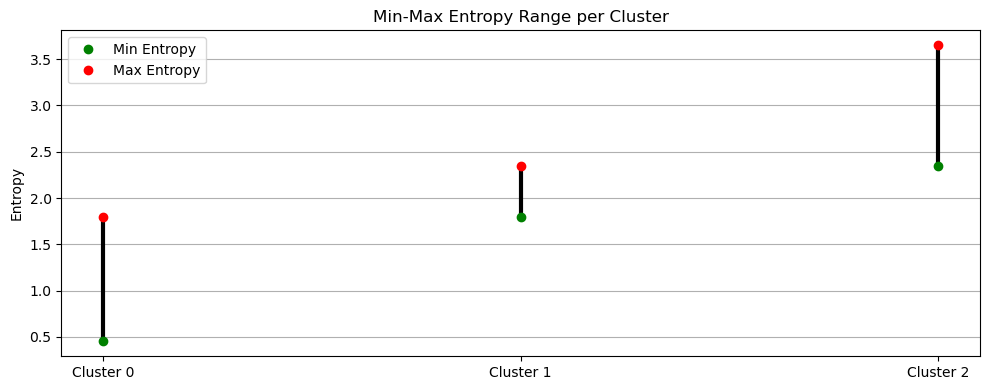

In [ ]:
# === Step 1: Prepare df_cluster and split by cluster ===
df_cluster = user_entropy_sorted[['user_id', 'cluster', 'entropy']].copy()

cluster0 = df_cluster[df_cluster['cluster'] == 0]
cluster1 = df_cluster[df_cluster['cluster'] == 1]
cluster2 = df_cluster[df_cluster['cluster'] == 2]

# === Step 2: Save clusters to CSV ===
df_cluster.to_csv("../preprocessing/df_cluster.csv", index=False)
cluster0.to_csv("../preprocessing/cluster_0_users.csv", index=False)
cluster1.to_csv("../preprocessing/cluster_1_users.csv", index=False)
cluster2.to_csv("../preprocessing/cluster_2_users.csv", index=False)

print("✅ df_cluster.csv and individual cluster files saved successfully.")

# === Step 3: Compute min and max entropy per cluster ===
min_entropy = [cluster0['entropy'].min(), cluster1['entropy'].min(), cluster2['entropy'].min()]
max_entropy = [cluster0['entropy'].max(), cluster1['entropy'].max(), cluster2['entropy'].max()]

# === Step 4: Print entropy ranges ===
print("\n🔍 Entropy Range per Cluster:")
for i, (min_val, max_val) in enumerate(zip(min_entropy, max_entropy)):
    print(f"Cluster {i} → Min Entropy: {min_val:.4f}, Max Entropy: {max_val:.4f}")

# === Step 5: Print cluster size and percentages ===
total_users = len(df_cluster)
print("\n📊 Cluster Distribution:")
for i, cluster_df in enumerate([cluster0, cluster1, cluster2]):
    count = len(cluster_df)
    percent = (count / total_users) * 100
    print(f"Cluster {i}: {count} users ({percent:.2f}%) out of {total_users}")

# === Step 6: Plot min-max entropy per cluster ===
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
fig, ax = plt.subplots(figsize=(10, 4))

for i, (min_val, max_val) in enumerate(zip(min_entropy, max_entropy)):
    ax.plot([i, i], [min_val, max_val], color='black', linewidth=3)
    ax.plot(i, min_val, 'go', label='Min Entropy' if i == 0 else "")
    ax.plot(i, max_val, 'ro', label='Max Entropy' if i == 0 else "")

# Customize plot
ax.set_xticks(range(len(clusters)))
ax.set_xticklabels(clusters)
ax.set_ylabel("Entropy")
ax.set_title("Min-Max Entropy Range per Cluster")
ax.grid(True, axis='y')
ax.legend()

plt.tight_layout()
plt.show()


In [25]:
df_final.columns

Index(['user_id', 'app_id', 'category', 'rating'], dtype='object')

These user_ids appear to be randomized alphanumeric strings, likely:

Hashes

Anonymized UUID-style strings

Possibly base64-like encodings

movie -> 943

In [ ]:
import pandas as pd
from docx import Document

# === Load datasets once ===
df_final = pd.read_csv("../data/df_final.csv")
df_240 = pd.read_csv("../data/df_240.csv")
df_528 = pd.read_csv("../data/df_528.csv")
df_1056 = pd.read_csv("../data/df_1056.csv")

datasets = {
    "df_final": df_final,
    "df_240": df_240,
    "df_528": df_528,
    "df_1056": df_1056
}

# Create a new Word document
document = Document()

# === Summary of Unique Counts ===
document.add_heading('Summary of Unique Counts', 1)
for name, df in datasets.items():
    document.add_heading(f'Dataset: {name}', 2)
    document.add_paragraph(f"Unique users: {df['user_id'].nunique()}")
    document.add_paragraph(f"Unique apps: {df['app_id'].nunique()}")
    document.add_paragraph(f"Total ratings: {len(df)}")
    document.add_paragraph()  # Empty paragraph for spacing

# === Detailed Category-wise Sanity Check ===
document.add_heading('Detailed Category-wise Sanity Check (Expected vs Actual Points)', 1)
for name, df in [("df_240", df_240), ("df_528", df_528), ("df_1056", df_1056)]:
    document.add_heading(f'Dataset: {name}', 2)

    total_users = df['user_id'].nunique()
    original_users = df_final['user_id'].nunique()
    fictitious_users = total_users - original_users
    categories = df['category'].unique()
    users_per_category = fictitious_users // len(categories)

    document.add_paragraph(f"Fictitious users per category: {users_per_category}")

    grouped = df.groupby('category')['user_id'].count().reset_index(name='total_points')
    apps_per_category = df.groupby('category')['app_id'].nunique().reset_index(name='unique_apps')
    merged = pd.merge(grouped, apps_per_category, on='category')

    for _, row in merged.iterrows():
        category = row['category']
        total_points = row['total_points']
        num_apps = row['unique_apps']
        expected_points = num_apps * users_per_category
        document.add_paragraph(f"{category} → {num_apps} apps, {users_per_category} synthetic users → "
                               f"Expected: {expected_points}, Found: {total_points}")
    document.add_paragraph()  # Empty paragraph for spacing

# === Additional Analysis on Real vs Synthetic Ratings ===
document.add_heading('Breakdown of Real vs Synthetic Ratings by Category', 1)

real_user_max = df_final['user_id'].max()

def analyze_dataset(df, name, users_per_category):
    document.add_heading(f'{name.upper()}', 2)
    categories = df['category'].unique()
    apps_per_category = df[df['user_id'] <= real_user_max].groupby('category')['app_id'].nunique()

    for category in sorted(categories):
        total_apps = apps_per_category.get(category, 0)

        df_real = df[(df['category'] == category) & (df['user_id'] <= real_user_max)]
        df_synth = df[(df['category'] == category) & (df['user_id'] > real_user_max)]

        real_points = len(df_real)
        synth_points = len(df_synth)
        synth_users = df_synth['user_id'].nunique()

        document.add_paragraph(f"{category} → {total_apps} apps, {synth_users} synthetic users → "
                               f"real: {real_points}, synthetic: {synth_points}, total: {real_points + synth_points}")
    document.add_paragraph()  # Empty paragraph for spacing

# Run analysis
analyze_dataset(df_240, "df_240", users_per_category=5)
analyze_dataset(df_528, "df_528", users_per_category=11)
analyze_dataset(df_1056, "df_1056", users_per_category=22)

# Save the document
document.save('../result/analysis.docx')

print("Analysis saved to analysis.docx")

Analysis saved to analysis.docx


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================== CONFIG ==================
OUTPUT_DIR = "/home/moshtasa/Research/phd-svd-recsys/SVD/App/result/domain_analysis"
DPI = 600  # high resolution for poster/export
HIGH_RATING_THRESHOLD = 4   # 4-5 considered "Positive"
LOW_RATING_THRESHOLD  = 3   # 1-3 considered "Negative/Neutral"

os.makedirs(OUTPUT_DIR, exist_ok=True)

# Modern seaborn styling
sns.set_theme(style="whitegrid", palette="husl")

# ================== SAFETY & PREP ==================
# Expect df with columns: user_id, app_id, category, rating
req_cols = {"user_id", "app_id", "category", "rating"}
missing = req_cols - set(df.columns)
if missing:
    raise ValueError(f"DataFrame is missing required columns: {missing}")

df_use = df.copy()

# Drop empty categories (optional; or fill with 'Unknown')
df_use = df_use.dropna(subset=["category"])
df_use["category"] = df_use["category"].astype(str)

# Coerce rating to numeric
df_use["rating"] = pd.to_numeric(df_use["rating"], errors="coerce")

# ================== AGGREGATIONS ==================
# Counts per category
uniq_apps = df_use.groupby("category")["app_id"].nunique()
total_rows = df_use.groupby("category").size()  # total interactions/rows per category
uniq_users = df_use.groupby("category")["user_id"].nunique()

# Rating stats per category
avg_rating = df_use.groupby("category")["rating"].mean()
med_rating = df_use.groupby("category")["rating"].median()

# Positive vs Negative shares
pos_share = df_use.assign(is_pos=(df_use["rating"] >= HIGH_RATING_THRESHOLD)) \
                  .groupby("category")["is_pos"].mean() * 100.0
neg_share = df_use.assign(is_neg=(df_use["rating"] <= LOW_RATING_THRESHOLD)) \
                  .groupby("category")["is_neg"].mean() * 100.0

# Dataset % by UNIQUE APPS (change to total_rows if you prefer interaction-weighted)
total_unique_apps = max(uniq_apps.sum(), 1)
dataset_pct = uniq_apps / total_unique_apps * 100.0

# Build summary frame
cat_df = pd.DataFrame({
    "Category": uniq_apps.index,
    "Unique_Apps": uniq_apps.values,
    "Total_Interactions": total_rows.reindex(uniq_apps.index).values,
    "Unique_Users": uniq_users.reindex(uniq_apps.index).values,
    "Avg_Rating": avg_rating.reindex(uniq_apps.index).values,
    "Median_Rating": med_rating.reindex(uniq_apps.index).values,
    "Positive_%": pos_share.reindex(uniq_apps.index).fillna(0).values,
    "Negative_%": neg_share.reindex(uniq_apps.index).fillna(0).values,
    "Dataset_%": dataset_pct.values
}).sort_values("Unique_Apps", ascending=False).reset_index(drop=True)

# ================== VOLUME CATEGORIES (by Dataset_%) ==================
def volume_bucket(pct):
    if pct >= 25:  return "Very High (25%+)"
    if pct >= 15:  return "High (15–25%)"
    if pct >= 8:   return "Medium (8–15%)"
    return "Low (<8%)"

cat_df["Volume_Category"] = cat_df["Dataset_%"].apply(volume_bucket)

# ================== DOMINANCE TYPE (by rating polarity) ==================
def dominance_type(row):
    if row["Positive_%"] >= 70: return "Positive-Dominant"
    if row["Negative_%"] >= 70: return "Negative-Dominant"
    return "Balanced"

cat_df["Dominance_Type"] = cat_df.apply(dominance_type, axis=1)

# Save summary CSV
summary_csv = os.path.join(OUTPUT_DIR, "category_summary.csv")
cat_df.to_csv(summary_csv, index=False)

# Colors (consistent but automatic)
colors = plt.cm.Set3(np.linspace(0, 1, len(cat_df)))

# ================== PLOT 1: Unique Apps per Category ==================
plt.figure(figsize=(10, 6))
order_1 = cat_df.sort_values("Unique_Apps", ascending=True)
bars1 = plt.barh(order_1["Category"], order_1["Unique_Apps"], color=colors)
plt.xlabel("Number of Unique Apps")
plt.title("Total Unique Apps per Category", fontsize=14, fontweight="bold")
plt.grid(False)
for bar, val in zip(bars1, order_1["Unique_Apps"]):
    plt.text(bar.get_width() + max(order_1["Unique_Apps"])*0.01,
             bar.get_y() + bar.get_height()/2, f"{val:,}",
             va="center", fontweight="bold", fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "plot1_unique_apps.png"), dpi=DPI, bbox_inches="tight")
plt.show()

# ================== PLOT 2: Dataset Percentage (Pie, by Unique Apps) ==================
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    cat_df["Dataset_%"],
    labels=cat_df["Category"],
    colors=colors,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Dataset Distribution by Category (by Unique Apps)", fontsize=14, fontweight="bold")
for t in texts: t.set_fontsize(8)
for a in autotexts:
    a.set_fontsize(7); a.set_fontweight("bold")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "plot2_dataset_pie.png"), dpi=DPI, bbox_inches="tight")
plt.show()

# ================== PLOT 3: Positive vs Negative Rating Share (Stacked) ==================
plt.figure(figsize=(12, 7))
order_3 = cat_df.sort_values("Positive_%", ascending=False)
x = np.arange(len(order_3))
bars3a = plt.bar(order_3["Category"], order_3["Positive_%"], label="Positive (≥4★)", alpha=0.85)
bars3b = plt.bar(order_3["Category"], order_3["Negative_%"], bottom=order_3["Positive_%"],
                 label="Negative/Neutral (≤3★)", alpha=0.7)
plt.ylabel("Percentage of Ratings")
plt.title("Positive vs Negative Rating Shares by Category", fontsize=14, fontweight="bold")
plt.legend()
plt.ylim(0, 100)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "plot3_pos_vs_neg_stacked.png"), dpi=DPI, bbox_inches="tight")
plt.show()

# ================== PLOT 4: Positive Rating Ranking ==================
plt.figure(figsize=(10, 7))
order_4 = cat_df.sort_values("Positive_%", ascending=True)
bars4 = plt.barh(order_4["Category"], order_4["Positive_%"], alpha=0.8)
plt.xlabel("Positive Ratings (%)")
plt.title("Categories Ranked by Positive Rating Share", fontsize=14, fontweight="bold")
plt.grid(False)
for bar, val in zip(bars4, order_4["Positive_%"]):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{val:.1f}%", va="center", fontweight="bold", fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "plot4_positive_share_ranking.png"), dpi=DPI, bbox_inches="tight")
plt.show()

# ================== PLOT 5: Negative Rating Ranking ==================
plt.figure(figsize=(10, 7))
order_5 = cat_df.sort_values("Negative_%", ascending=True)
bars5 = plt.barh(order_5["Category"], order_5["Negative_%"], alpha=0.8)
plt.xlabel("Negative/Neutral Ratings (%)")
plt.title("Categories Ranked by Negative/Neutral Rating Share", fontsize=14, fontweight="bold")
plt.grid(False)
for bar, val in zip(bars5, order_5["Negative_%"]):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{val:.1f}%", va="center", fontweight="bold", fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "plot5_negative_share_ranking.png"), dpi=DPI, bbox_inches="tight")
plt.show()

# ================== PLOT 6: Positive vs Negative Scatter (Bubble) ==================
plt.figure(figsize=(10, 7))
plt.scatter(cat_df["Positive_%"], cat_df["Negative_%"],
            s=cat_df["Dataset_%"] * 20, c=range(len(cat_df)), cmap="viridis", alpha=0.7)
for i, cat in enumerate(cat_df["Category"]):
    plt.annotate(cat[:10], (cat_df["Positive_%"][i], cat_df["Negative_%"][i]),
                 xytext=(5, 5), textcoords="offset points", fontsize=8)
plt.xlabel("Positive Ratings (%)")
plt.ylabel("Negative/Neutral Ratings (%)")
plt.title("Positive vs Negative Shares by Category\n(Bubble size = Dataset % by Unique Apps)",
          fontsize=14, fontweight="bold")
plt.grid(True, alpha=0.3)
plt.plot([0, 100], [100, 0], 'r--', alpha=0.4, label="Complimentary 100% line")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "plot6_pos_vs_neg_scatter.png"), dpi=DPI, bbox_inches="tight")
plt.show()

# ================== PLOT 7: Volume Categories ==================
order = ["Very High (25%+)", "High (15–25%)", "Medium (8–15%)", "Low (<8%)"]
vc = cat_df["Volume_Category"].value_counts().reindex(order).fillna(0).astype(int)

plt.figure(figsize=(10, 6))
bars7 = plt.bar(vc.index, vc.values, alpha=0.85)
plt.ylabel("Number of Categories")
plt.title("Category Count by Volume Bucket (by Unique Apps %)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
for bar, value in zip(bars7, vc.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, str(value),
             ha="center", fontweight="bold")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "plot7_volume_buckets.png"), dpi=DPI, bbox_inches="tight")
plt.show()

# ================== PLOT 8: Dominance Classification ==================
dom_counts = cat_df["Dominance_Type"].value_counts()
dom_order = ["Positive-Dominant", "Negative-Dominant", "Balanced"]
dom_counts = dom_counts.reindex(dom_order).fillna(0).astype(int)

plt.figure(figsize=(9, 6))
bars8 = plt.bar(dom_counts.index, dom_counts.values, alpha=0.85)
plt.ylabel("Number of Categories")
plt.title("Category Classification by Rating Dominance", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
for bar, value in zip(bars8, dom_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, str(value),
             ha="center", fontweight="bold")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "plot8_dominance_classification.png"), dpi=DPI, bbox_inches="tight")
plt.show()

# ================== PLOT 9: Combined Statistics Table ==================
plt.figure(figsize=(12, 8))
ax = plt.gca(); ax.axis("tight"); ax.axis("off")
table_df = cat_df[[
    "Category", "Unique_Apps", "Dataset_%", "Positive_%", "Negative_%",
    "Avg_Rating", "Median_Rating", "Dominance_Type"
]].copy()

# Pretty formatting
table_df_fmt = table_df.copy()
table_df_fmt["Unique_Apps"] = table_df_fmt["Unique_Apps"].map("{:,}".format)
table_df_fmt["Dataset_%"] = table_df_fmt["Dataset_%"].map(lambda x: f"{x:.1f}%")
table_df_fmt["Positive_%"] = table_df_fmt["Positive_%"].map(lambda x: f"{x:.1f}%")
table_df_fmt["Negative_%"] = table_df_fmt["Negative_%"].map(lambda x: f"{x:.1f}%")
table_df_fmt["Avg_Rating"]  = table_df_fmt["Avg_Rating"].map(lambda x: f"{x:.2f}")
table_df_fmt["Median_Rating"] = table_df_fmt["Median_Rating"].map(lambda x: f"{x:.2f}")

table = plt.table(
    cellText=table_df_fmt.values,
    colLabels=table_df_fmt.columns.tolist(),
    cellLoc="center", loc="center",
    colColours=["lightgray"] * table_df_fmt.shape[1]
)
table.auto_set_font_size(False); table.set_fontsize(8); table.scale(1, 1.5)
plt.title("Category Statistics Summary Table", fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "plot9_summary_table.png"), dpi=DPI, bbox_inches="tight")
plt.show()

# ================== SUMMARY PRINTS ==================
print("=" * 90)
print("CATEGORY STATISTICS SUMMARY")
print("=" * 90)
print(f"Total Categories Analyzed: {len(cat_df)}")
print(f"Total Unique Apps: {cat_df['Unique_Apps'].sum():,}")
print(f"Average Unique Apps per Category: {cat_df['Unique_Apps'].mean():.0f}")
print(f"Median Unique Apps per Category: {cat_df['Unique_Apps'].median():.0f}\n")

print("DOMINANCE CLASSIFICATION (by ratings):")
for dom_type, count in dom_counts.items():
    cats_in_type = cat_df[cat_df["Dominance_Type"] == dom_type]["Category"].tolist()
    print(f"{dom_type}: {count} categories - {', '.join(cats_in_type)}")

print("\nTOP 5 BY UNIQUE APPS:")
top_5_volume = cat_df.nlargest(5, "Unique_Apps")[["Category", "Unique_Apps", "Dataset_%"]]
for _, row in top_5_volume.iterrows():
    print(f"  {row['Category']}: {row['Unique_Apps']:,} apps ({row['Dataset_%']:.1f}%)")

print("\nHIGHEST POSITIVE RATING SHARE:")
top_pos = cat_df.nlargest(5, "Positive_%")[["Category", "Positive_%"]]
for _, row in top_pos.iterrows():
    print(f"  {row['Category']}: {row['Positive_%']:.1f}% positive")

print("\nHIGHEST NEGATIVE RATING SHARE:")
top_neg = cat_df.nlargest(5, "Negative_%")[["Category", "Negative_%"]]
for _, row in top_neg.iterrows():
    print(f"  {row['Category']}: {row['Negative_%']:.1f}% negative/neutral")

print(f"\nSaved figures & CSV to: {os.path.abspath(OUTPUT_DIR)}")
print(f"Summary CSV: {summary_csv}")
